# Transformer Dose Calculation 

## Import libraries and define auxiliary functions

In [14]:
import h5py
import numpy as np
import random
import math
import json
from src.models import multi_energy_model
from src.preprocessing import DataRescaler
from src.generators import DataGenerator
from src.evaluation import infer, from_file
from src.plot import plot_slice, plot_beam
import matplotlib.pyplot as plt
%matplotlib inline

## Load hyperparameters and data

In [15]:
# Load model and data hyperparameters.
with open("./hyperparam.json", "r") as hfile:
    param = json.load(hfile)

# Prepare input data.
path = "./data/training/"
path_test = "./data/test/"
path_weights = "./weights/last/weights.ckpt"
filename = path + "train.h5"
filename_test = path_test + "test.h5"
with h5py.File(filename_test, 'r') as fh:
    testIDs = [*range(fh['geometry'].shape[-1])]

# Load normalization constants.
scaler = DataRescaler(path, filename=filename)
scaler.load(inputs=True, outputs=True)
scale = {"y_min":scaler.y_min, "y_max":scaler.y_max,
        "x_min":scaler.x_min, "x_max":scaler.x_max,
        "e_min":70, "e_max":220}

## Define and train the transformer

In [ ]:
transformer = multi_energy_model(
    num_tokens=param["num_tokens"],
    input_shape=param["data_shape"],
    projection_dim=param["projection_dim"],
    num_heads=param["num_heads"],
    num_transformers=param["num_transformers"], 
    kernel_size=param["kernel_size"],
    causal=True
)
transformer.summary()

# Load weights from checkpoint.
transformer.load_weights(path_weights)

## Evaluate the model on test data

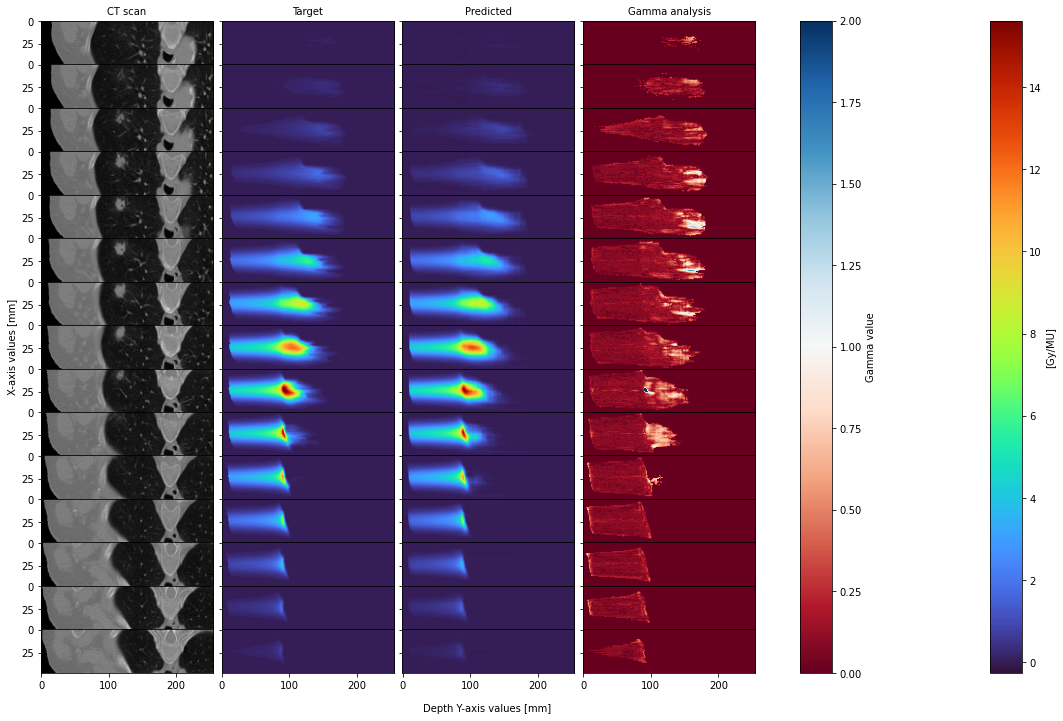

In [7]:
inputs, prediction, ground_truth = infer(transformer, testIDs[8], filename_test, scale)
plot_beam(inputs, ground_truth, prediction,  gamma_evaluation=True)

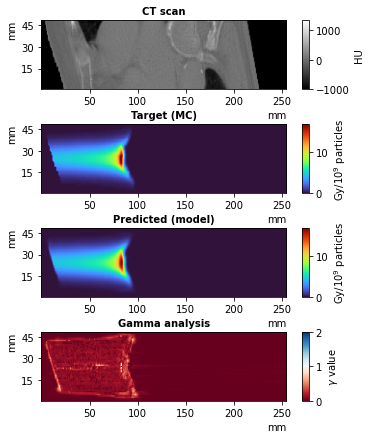

In [7]:
inputs, prediction, ground_truth = infer(transformer, testIDs[3], filename_test, scale)
plot_slice(inputs, ground_truth, prediction, scale, savefig=False)

Mean: 0.9922243175804234
Stdev: 0.01601239330562533
Min: 0.8375546814689556
Max: 1.0
Three worst IDs: [ 314  313 1418]


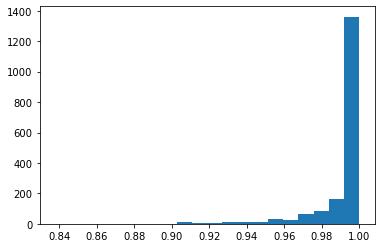

In [13]:
# Load gamma results
gamma_results = np.load('./utils/eval/gamma_analysis_pba.npz')
gamma_passrate = gamma_results["arr_1"]

# Plot histogram
plt.hist(gamma_passrate[0], 20)

# Print statistics
print(f"Mean: {np.mean(gamma_passrate[0])}")
print(f"Stdev: {np.std(gamma_passrate[0])}")
print(f"Min: {np.amin(gamma_passrate[0])}")
print(f"Max: {np.amax(gamma_passrate[0])}")

# Print worst sample IDs
gamma_IDs = gamma_results["arr_0"]
print(f"Three worst IDs: {gamma_IDs[0,:3]}")

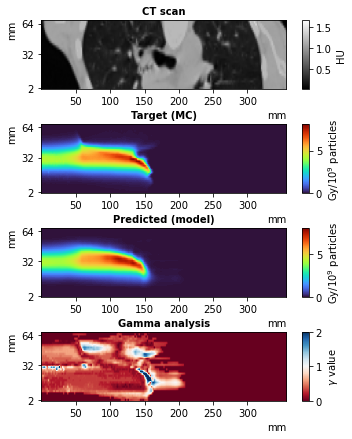

In [10]:
inputs, prediction, ground_truth = infer(transformer, testIDs[150], filename_test, scale)
plot_slice(inputs, ground_truth, prediction, scale, cutoff=0.1, savefig=True)